## K-近邻算法（kNN, K-Nearest Neighbors）

介绍第一个机器学习算法：kNN， k-近邻算法，二分简单也易于理解。

简单的说，k-近邻算法采用测量不同特征值之间的距离方法进行分类。即对于输入样本 inX，计算 inX 与训练集中各个样本的距离，然后统计最近 k 个样本的标签，返回占比最多的样本作为结果。

In [3]:
from numpy import *

In [61]:
'''
k-NN 分类器
'''
import operator
import matplotlib.pyplot as plt

# kNN 分类器
def kNNClassifier(inX, dataSet, labels, k):
    m = dataSet.shape[0] # 与 shape(dataSet)[0] 等价。
    # 计算输入样本 inX 与训练集中各个样本之间的距离。
    diffMat = tile(inX, (m, 1)) - dataSet 
    squaredMat = diffMat.A ** 2
    dists = sum(squaredMat, axis = 1)
    dists = dists ** 0.5
    sortedDistIndices = dists.argsort() # 使用 argsort 是为了保证与 label 标签保持对应。
    
    countLabels = {}
    for i in range(k):
        votedLabel = labels[sortedDistIndices[i]]
        countLabels[votedLabel] = countLabels.get(votedLabel, 0) + 1
    sortedCount = sorted(countLabels.items(), key = operator.itemgetter(1), reverse = True)
    return sortedCount[0][0]

# 绘制二维数据。
def plotKnn(dataSet, labels, labelsStr = None ,inX = None, xLabel = None):
    types = len(set(labels)); labelsLen = len(labels)
    typesMat = [[] for i in range(types)]
    for i in range(labelsLen):
        label = labels[i] -1
        typesMat[label].append(dataSet[i])
    
    if not labelsStr:
        labelsStr = []
        for i in range(types):
            labelsStr.append('Label ' + str(i + 1))
    colors = ['c', 'b', 'g']       
    for i in range(types):
        typeMat = mat(typesMat[i])
        plt.scatter(typeMat[:,0], typeMat[:,1], c=colors[i], label = labelsStr[i])
    if (inX):
        plt.scatter(inX[0], inX[1], marker='x', c=colors[xLabel - 1], label = 'The One')
    plt.legend()
    plt.show()
    return

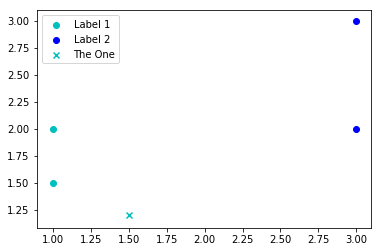

In [62]:
# 测试 k-NN 分类
dataSet = [[1,2],[1,1.5],[3,2],[3,3]]
dataMat = mat(dataSet)
labels = [1,1,2,2]
inX = [1.5,1.2]
xLabel = kNNClassifier(inX, dataMat, labels, 2)
plotKnn(dataSet, labels, None, inX, xLabel)

In [63]:
'''
使用 k-NN 算法改进约会网站效果
'''
import matplotlib.pyplot as plt
def loadDataset(fileName):
    fr = open(fileName)
    fLines = fr.readlines()
    m = len(fLines)
    dataSet = zeros((m, 3))
    labels = []
    index = 0
    for line in fLines:
        lineArr = line.strip().split('\t')
        dataSet[index] = lineArr[0:3]
        labels.append(int(lineArr[3]))
        index += 1
    return dataSet, labels

# 获取分类数据
def getClassifiedData(dataSet, labels):
    typesList = [[] for i in set(labels)]
    index = 0
    for i in labels:
        typesList[i - 1].append(dataSet[index])
        index += 1
    return typesList

# 绘制 dating 特征图。
def plotDatingData(dataList, dims = [0, 1], title = ''):
    features = ['Flying Miles', 'Playing Time', 'Ice-creams']
    labelNames = ['didntLike', 'smallDoses', 'largeDoses']
    
    typesMat1 = mat(dataList[0])
    typesMat2 = mat(dataList[1])
    typesMat3 = mat(dataList[2])
    
    type1 = plt.scatter(typesMat1[:,dims[0]], typesMat1[:,dims[1]])
    type2 = plt.scatter(typesMat2[:,dims[0]], typesMat2[:,dims[1]])
    type3 = plt.scatter(typesMat3[:,dims[0]], typesMat3[:,dims[1]])
    plt.legend([type1, type2, type3], labelNames)
    plt.xlabel(features[dims[0]])
    plt.ylabel(features[dims[1]])
    plt.title(title)
    plt.show()
    return
    

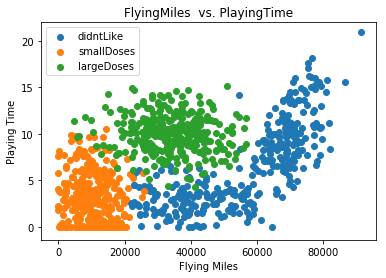

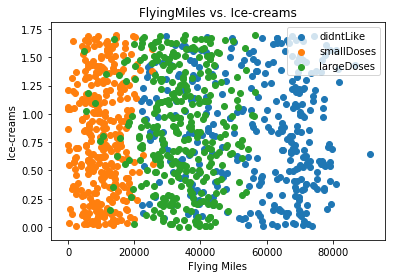

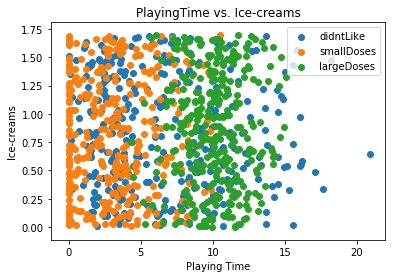

In [64]:
dateDataset, dateLabels = loadDataset('datingTestSet2.txt')
typesList = getClassifiedData(dateDataset, dateLabels)

plotDatingData(typesList, [0,1], 'FlyingMiles  vs. PlayingTime')
plotDatingData(typesList, [0,2], 'FlyingMiles vs. Ice-creams')
plotDatingData(typesList, [1,2], 'PlayingTime vs. Ice-creams')

In [30]:
'''
关于 k-NN 距离计算需要考虑的点
'''
dateDataset[26], dateDataset[25]

(array([  5.74100000e+03,   0.00000000e+00,   1.65641800e+00]),
 array([  3.67880000e+04,   1.24582580e+01,   6.49617000e-01]))

### 归一化数据
由上面的 `dateDataset[26], dateDataset[25]` 可知，如果计算样本 25 与 26 之间的距离，直接用欧氏距离可以计算得：

\begin{equation*}
\sqrt{(5741 - 36788)^2 + (0 - 12.458258)^2 + (1.656418 - 0.649617)^2}
\end{equation*}

很容易发现，上面方程数值差值最大的属性对计算结果的影响很大。我们希望三个特征的比重一致。在处理这种不同取值范围的特征值时，我们通常采用的方法是将数值归一化处理。下面的公式可以将做生意取值的特征值转化为[0,1]区间之内:

\begin{equation*}
newValue = \frac{oldValue - min}{max - min}
\end{equation*}


In [65]:
'''
归一化数据：normalizing values. 注意 matrix 的运算。
'''
def autoNorm(dataMat):
    # 获取 matrix 各列的最小和最大值
    minVals = dataMat.min(0)
    maxVals = dataMat.max(0)
    ranges = maxVals - minVals
    normDataset = zeros(shape(dataMat))
    m = dataMat.shape[0] # 样本个数
    normDataset = dataMat - tile(minVals, (m, 1))
    normDataset = normDataset * 1.0 / tile(ranges, (m, 1))
    return normDataset, ranges, minVals
  

### 测试 k-NN 算法
通常我们只提供 90% 的数据样本用来训练分类器，而用 10% 的数据用来测试分类器。hold-out cross validation, 即留存交叉验证。

In [68]:
'''
测试分类器
'''
def datingClassTest (k = 3):
    hoRatio = 0.10 # hold-out cross validation ratio
    dataSet, labels = loadDataset('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(mat(dataSet))
    m = shape(normMat)[0]
    numTestVecs = int(hoRatio * m)
    error = 0
    for i in range(numTestVecs):
        retLabel = kNNClassifier(normMat[i,:], normMat[numTestVecs:m, :], labels[numTestVecs:m], k)
        if (retLabel != labels[i]):
            error += 1.0
    print ('\t The total error rate is: ', (error / float(numTestVecs)))
    

In [69]:
print ('k = 2')
datingClassTest(2)
print ('k = 3')
datingClassTest()
print ('k = 5')
datingClassTest(5)
print ('k = 6')
datingClassTest(6)

k = 2
	 The total error rate is:  0.08
k = 3
	 The total error rate is:  0.05
k = 5
	 The total error rate is:  0.05
k = 6
	 The total error rate is:  0.05


### 总结
k-NN 算法是分类数据最有效的算法。但是 k-NN 算法必须保存全部数据集，如果训练集很大时，必须使用大量的存储空间。此外，由于需要对数据集中的每个数据计算距离值，实际使用时可能非常耗时。
k-NN 算法的另一个缺陷是无法给出任何数据的基础结构信息，因此我们无法知晓平均实例样本和典型实例样本具有什么特征。